In [2]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [3]:
count=0
dirs = os.listdir('flowers/')
for dir in dirs:
    files = list(os.listdir('flowers/'+dir))
    print(dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print('Images Folder has '+ str(count) + ' Images')

daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folder has 4317 Images


In [4]:
base_dir = 'flowers/'
img_size = 100
batch = 32


In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))
val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))
                                                        

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [6]:
flower_names = train_ds.class_names
flower_names


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [7]:
import matplotlib.pyplot as plt

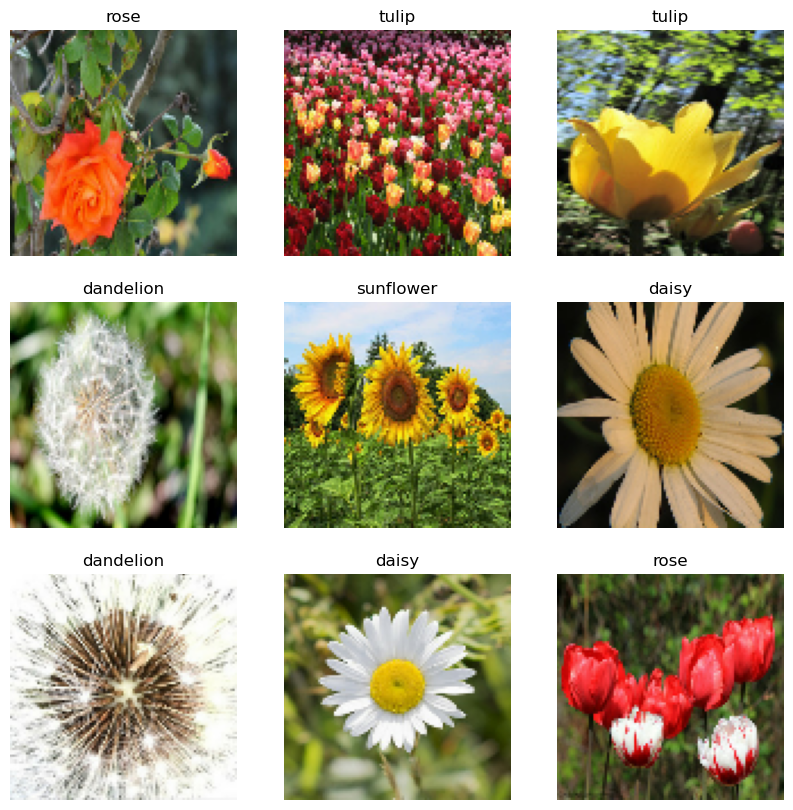

In [8]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9): 
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [14]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [15]:
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential

img_size = 224  # Example size, adjust as needed

# Define the model
model = Sequential([
    Input(shape=(img_size, img_size, 3)),  # Specify the input shape as the first layer
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# You can now proceed to add other layers like Conv2D, Dense, etc., after this


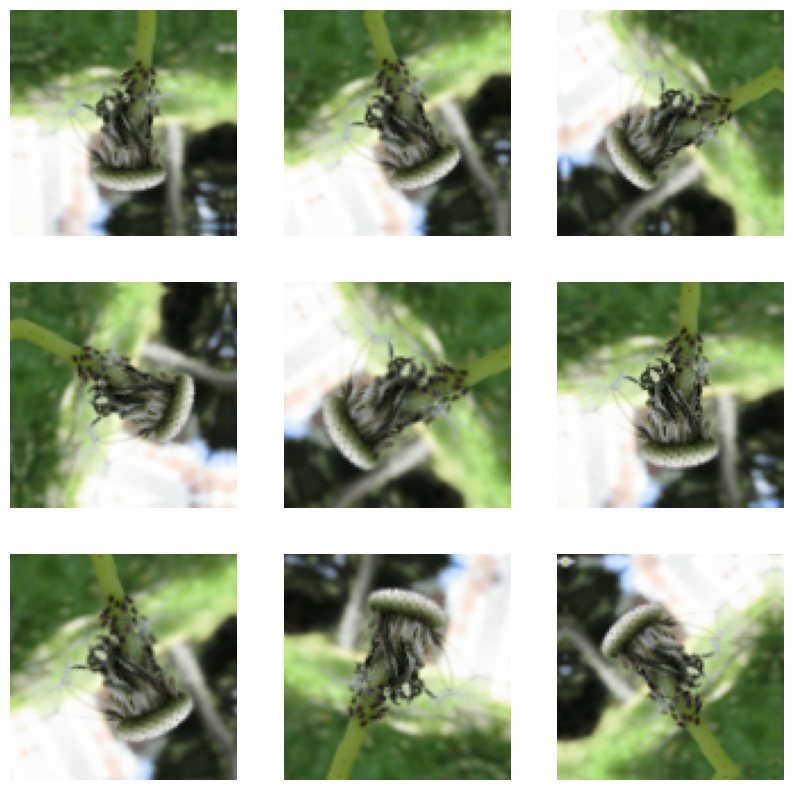

In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Define data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
])

# Visualize augmented images
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        augmented = data_augmentation(images)
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented[0].numpy().astype("uint8"))
        plt.axis("off")


In [17]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (32, 100, 100, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (32, 100, 100, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 100, 100, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 50, 50, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 50, 50, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 25, 25, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 25, 25, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 12, 12, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 12, 12, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 9216)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 128)              │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 5)                │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,204,005 (4.59 MB)

 Trainable params: 1,204,005 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 31s 232ms/step - accuracy: 0.3367 - loss: 1.4469 - val_accuracy: 0.5284 - val_loss: 1.1388
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 177ms/step - accuracy: 0.5374 - loss: 1.1326 - val_accuracy: 0.4948 - val_loss: 1.2389
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 175ms/step - accuracy: 0.5718 - loss: 1.0572 - val_accuracy: 0.5307 - val_loss: 1.1616
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step - accuracy: 0.5967 - loss: 1.0056 - val_accuracy: 0.6095 - val_loss: 0.9618
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.6178 - loss: 0.9451 - val_accuracy: 0.6165 - val_loss: 1.0029
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - accuracy: 0.6477 - loss: 0.8916 - val_accuracy: 0.6570 - val_loss: 0.8692
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - accuracy: 0.6679 - loss: 0.8513 - val_accuracy: 0.5840 - val_loss: 1.0448
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - accuracy: 0.6513 - loss: 0

In [24]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(100, 100))   # Match training size
    input_image_array = tf.keras.utils.img_to_array(input_image) / 255.0        # Normalize
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)                  # Shape becomes (1, 100, 100, 3)
    
    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of ' + str(np.max(result) * 100)
    print(outcome)


In [30]:
classify_images('sample/rose.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
The Image belongs to dandelion with a score of 87.3845636844635


In [31]:
model.save('Flower_Recog_Model.h5')